# **TITLE: Clustering-Mall Customers Segmentation**

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Upload Required libraries**

In [386]:
#Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN,KMeans
from sklearn.datasets import make_circles
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

# **Loading the Data**

In [387]:
#Read the data
df=pd.read_csv('/content/drive/MyDrive/ML/Data/Proj3_MallCustomers_Data_Project (1).csv')

# **Overview of Dataset**

In [388]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [389]:
#datainfo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [390]:
#Structure of dataset
print('Dimensions: {} Rows and {} Columns '.format(df.shape[0], df.shape[1]))

Dimensions: 200 Rows and 5 Columns 


In [391]:
# Description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [392]:
#Finding the missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [393]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [394]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# **Visualization**

# **Annual Income Distribution:**

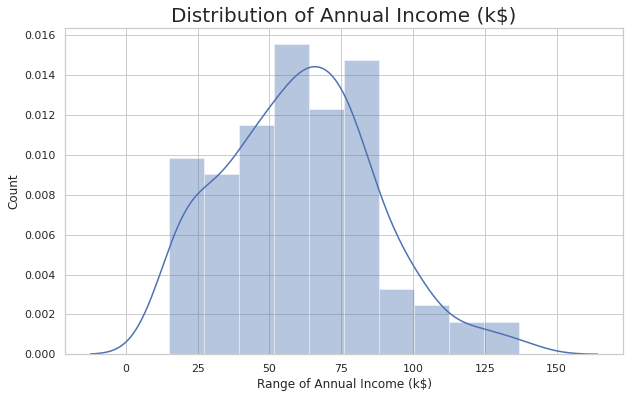

In [395]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

* Most of the annual income falls between 50K to 85K.






---





# **Age Distribution:**

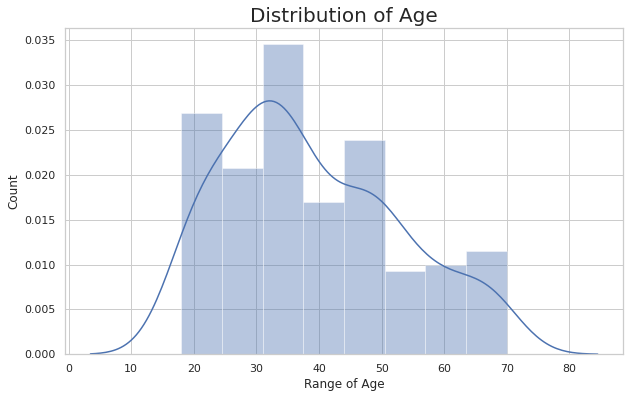

In [396]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()



*   **Customers are in different age groups mostly age groups are between 30-40**




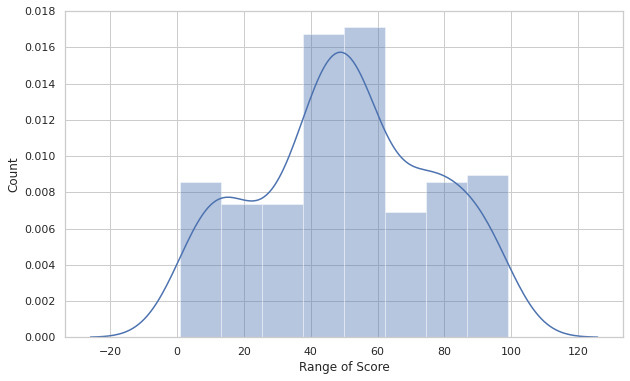

In [397]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('', fontsize = 20)
plt.xlabel('Range of Score')
plt.ylabel('Count')
plt.show()


**The maximum spending score is in the range of 40 to 60.**

# **Gender Analysis:**

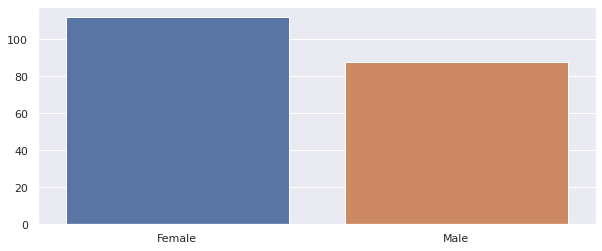

In [477]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

**More Female customers than Males**

# **Model 1:Kmeans **

First, we work with two features only, annual income and spending score.

In [399]:
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [400]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


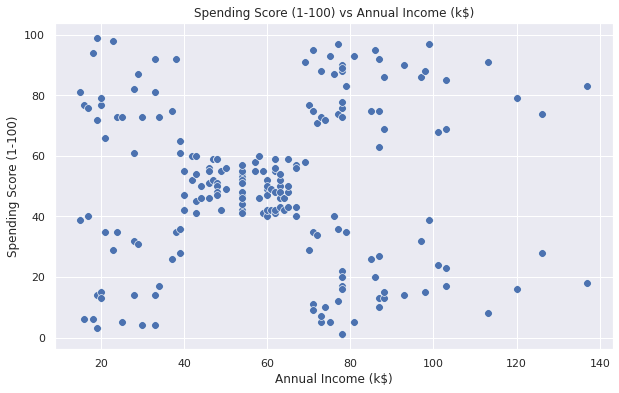

In [401]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# Building the model and training the model

# Evaluate the optimum values of Hyperparameters

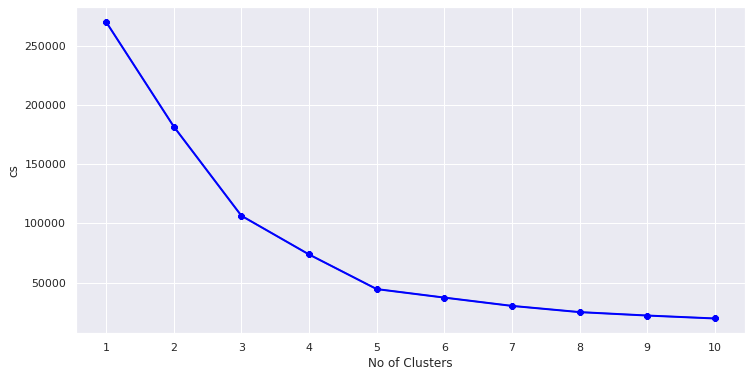

In [402]:
cs=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    cs.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),cs)
plt.plot(range(1,11),cs, linewidth=2, color="blue",marker="8")
plt.xlabel("No of Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("cs")
plt.show()

**From elbow method we found the minimum k value at k=5, we have minimum error value**
* Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.








In [403]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["Cluster"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [410]:
#Taking 5 clusters
km1=KMeans(n_clusters=3)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["Cluster1"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster1
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,3,1


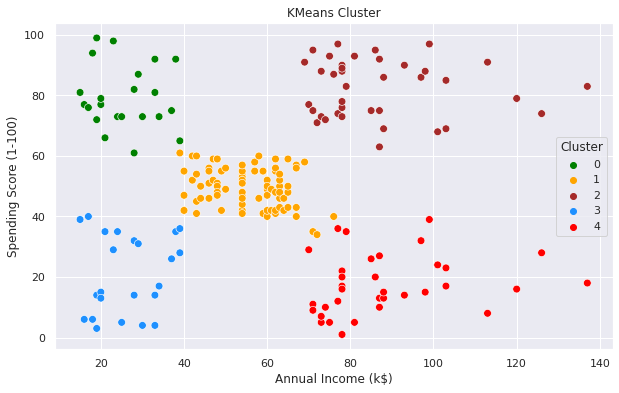

In [411]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Cluster",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('KMeans Cluster')
plt.show()

# With K=3

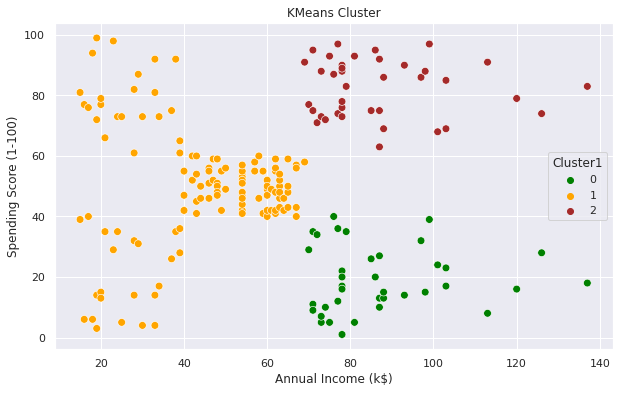

In [412]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Cluster1",  
                 palette=['green','orange','brown'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('KMeans Cluster')
plt.show()

In [413]:
df2=df1.drop(columns='Gender')

In [414]:
metrics.silhouette_score(df2,df2['Cluster'])

0.44020431715790337

**Silhouette_score for Skmean is 44%**

Cluster number================= 3 

[19 20 31 35 64 67 58 37 52 46 54 45 40 60 53 49 42 36 65 48]
Cluster number================= 0 

[21 23 22 30 35 24 20 25 31 29 18]
Cluster number================= 1 

[31 50 27 29 49 33 59 47 51 69 53 70 19 67 54 63 18 43 68 32 60 26 45 40
 23 57 38 46 21 48 55 22 34 24 20 66 65 25 28]
Cluster number================= 2 

[39 31 40 38 29 32 35 28 34 27 30 36 33]
Cluster number================= 4 

[23 59 47 20 44 19 57 25 48 34 43 37 56 50 42 36 40 52 58 46 41 54 33 45
 32]


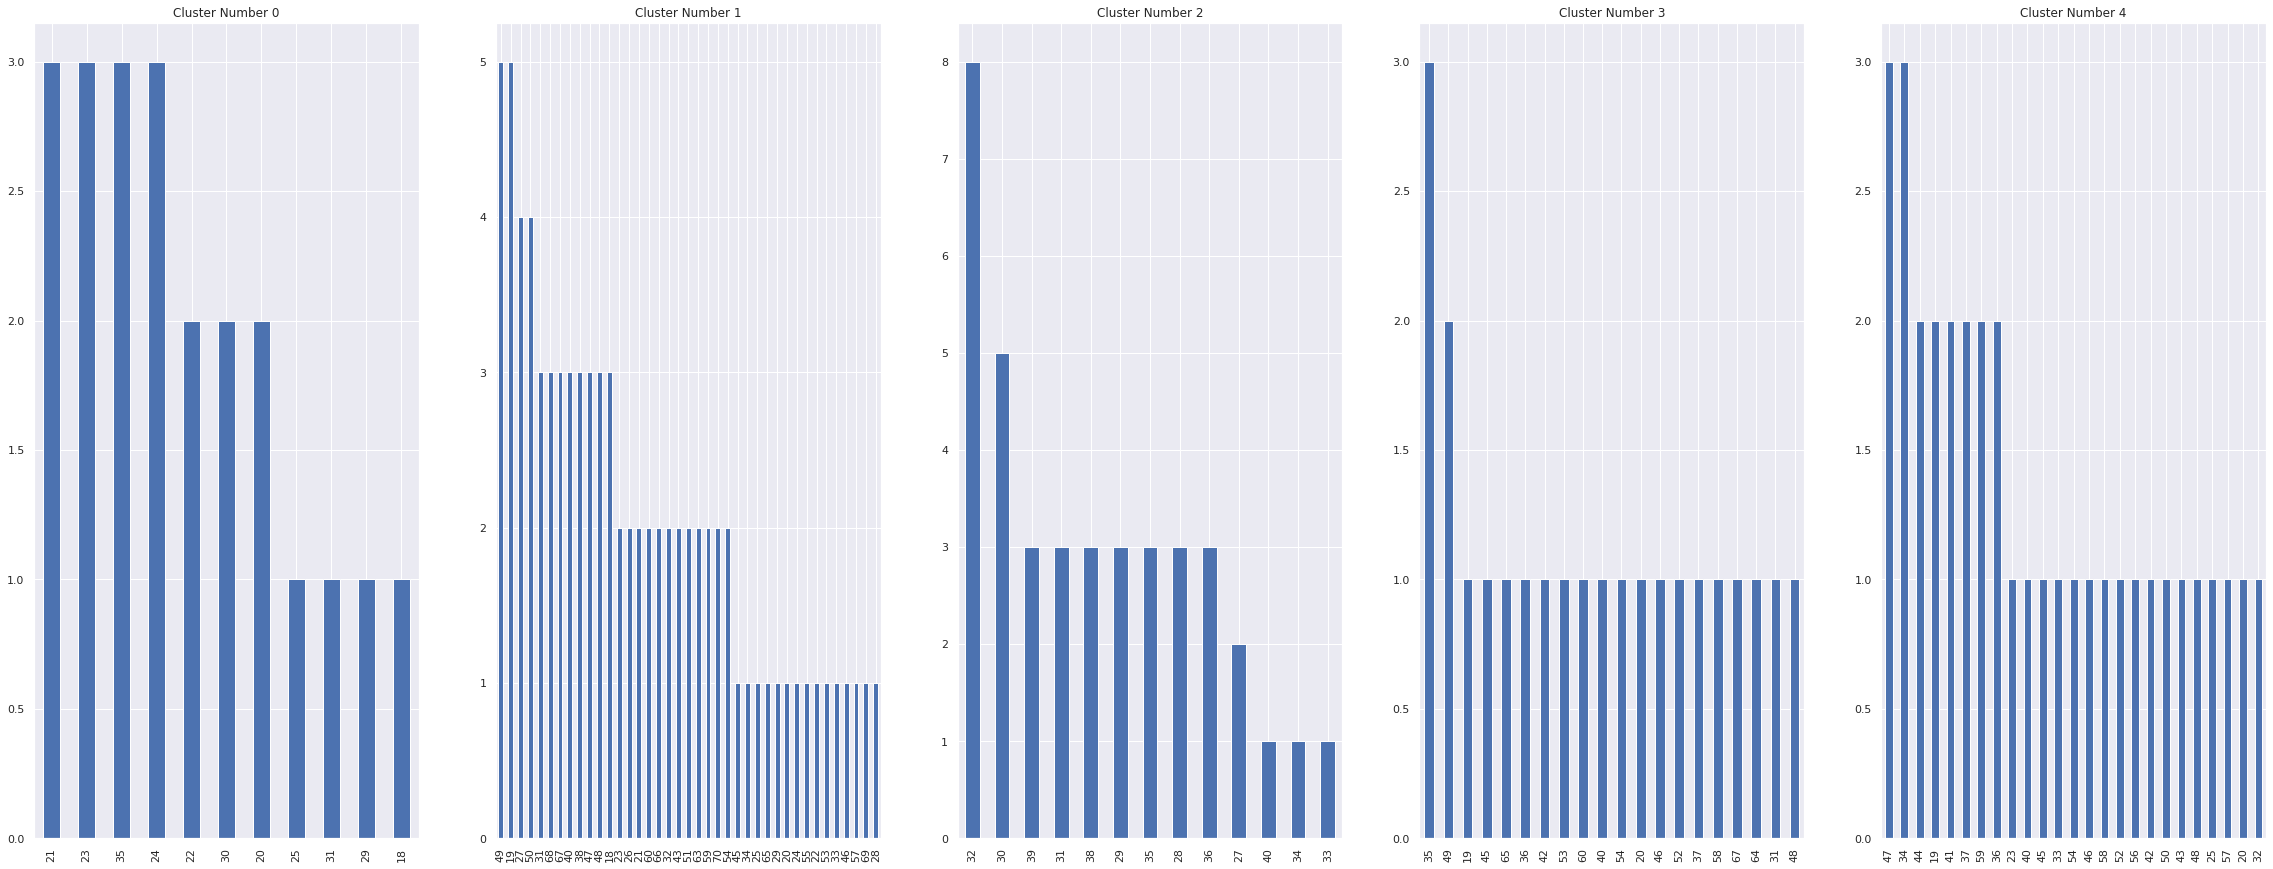

In [480]:
fig,axs=plt.subplots(ncols=len(df1['Cluster'].unique()),figsize=(40,15))
for n in df1['Cluster'].unique():
  print('Cluster number=================',str(n),'\n')
  df3=df1[['Age','Cluster']][df1['Cluster']==n]
  print(df3.Age.unique())
  df3.Age.value_counts().plot(kind='bar',ax=axs[n])
  axs[n].set_title('Cluster Number {}'.format(n))

plt.show()

# **Model 2:Hierarchical Clustering Algorithm**

# **Plotting Dendogram**

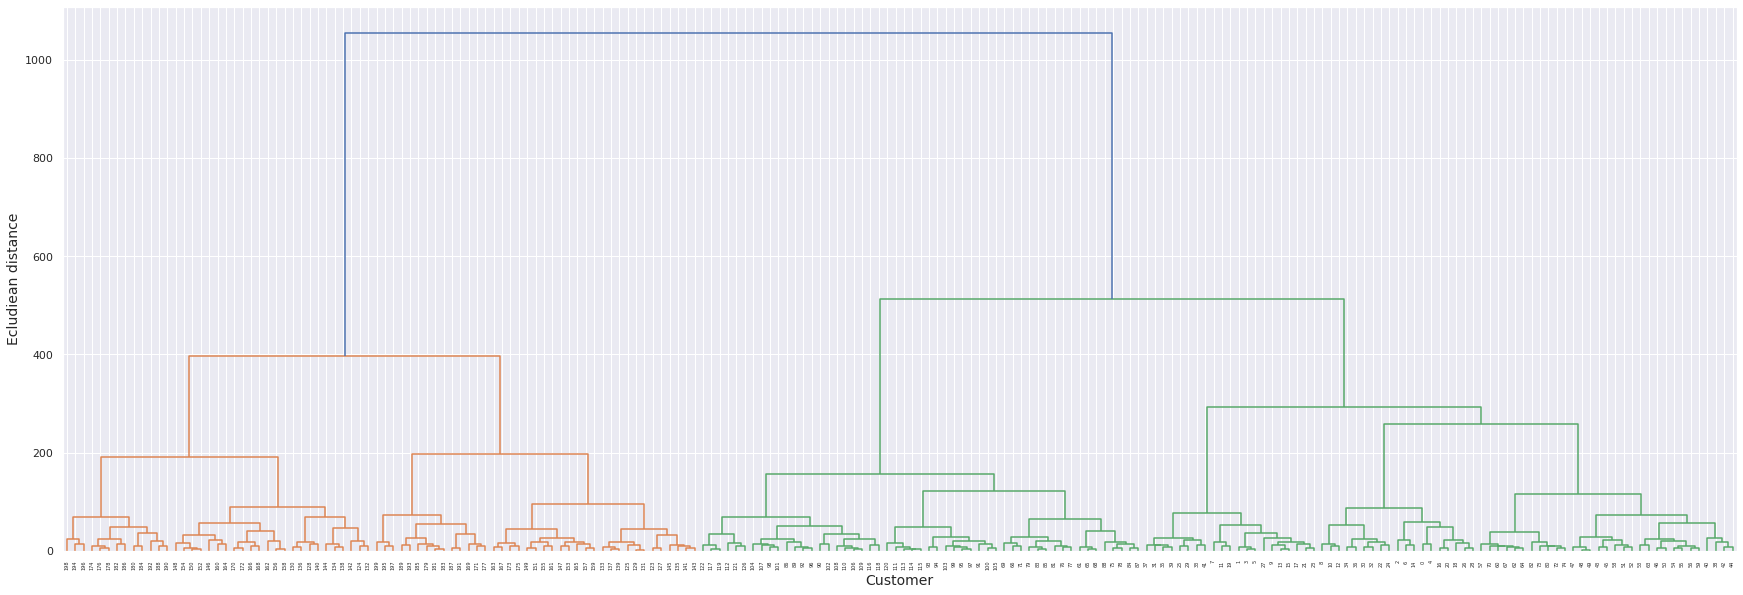

In [416]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df2, method = 'ward'),labels=df.index)
plt.ylabel('Ecludiean distance',fontsize=14)
plt.xlabel('Customer',fontsize=14)

plt.show()

**There seems suitable threshold value as per the rule for cutting the longest vertical line to get optimal number of clusters.**

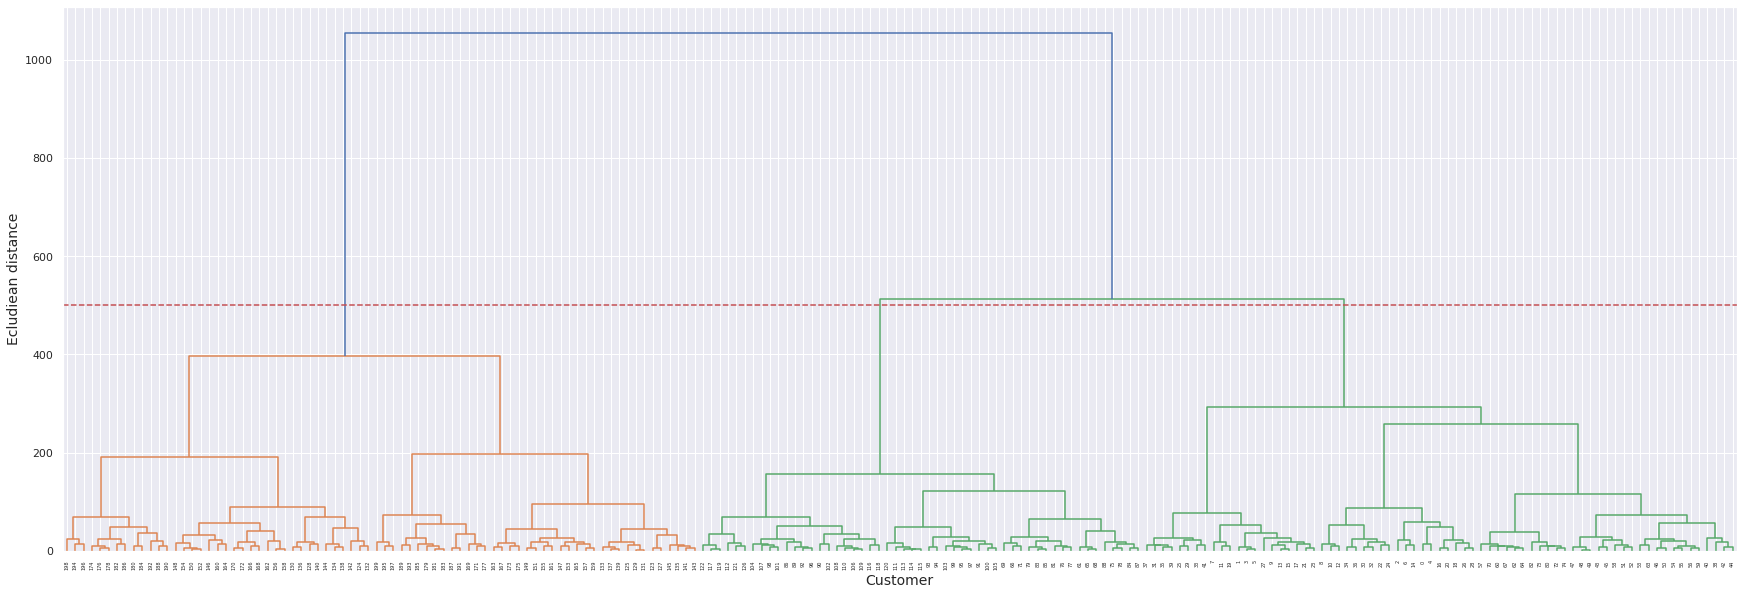

In [417]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df2, method = 'ward'),labels=df.index)
plt.axhline(y=500,c='r',linestyle='--')
plt.ylabel('Ecludiean distance',fontsize=14)
plt.xlabel('Customer',fontsize=14)

plt.show()

**No. of clusters=3**

# **Model Building**

In [465]:
from sklearn.cluster import AgglomerativeClustering
hc_model=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='average')
hc_model=hc_model.fit_predict(df2)

In [466]:
df2['hc_Cluster']=hc_model

In [467]:
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster1,hc_Cluster,DBSCAN_Cluster1,DBSCAN_Cluster
0,1,19,15,39,3,1,1,-1,-1
1,2,21,15,81,0,1,1,-1,0
2,3,20,16,6,3,1,1,-1,-1
3,4,23,16,77,0,1,1,-1,0
4,5,31,17,40,3,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,2,2,0,-1,-1
196,197,45,126,28,4,0,0,-1,-1
197,198,32,126,74,2,2,0,-1,-1
198,199,32,137,18,4,0,0,-1,-1


**Visualising Clusters**

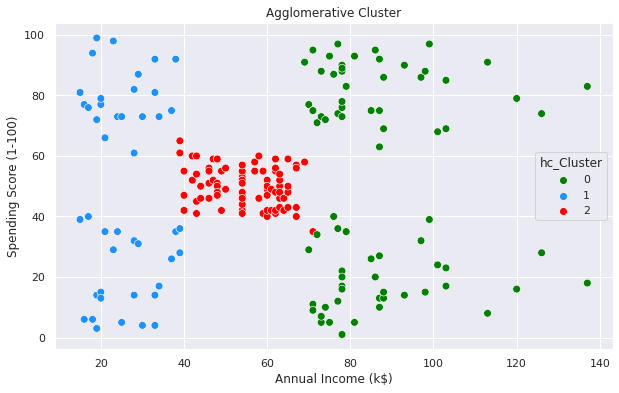

In [468]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="hc_Cluster",  
                 palette=['green','dodgerblue','red'], legend='full',data = df2  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Agglomerative Cluster')
plt.show()

In [469]:
metrics.silhouette_score(df2,df2['hc_Cluster'])

0.38099414882653415

* If we are passing linkage parameters like single the score is 8%
* If we are passing linkage parameters like complete the score is 35%
* If we are passing linkage parameters like average the score is 38%
* If we are passing linkage parameters like ward the score is 37%
* **Silhouette_score for Agglomerative clustering with linkage average giving better score.So, passed the linkage parameter as ward that is 38%**


# **Model3:DBSCAN**

In [423]:
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster1,hc_Cluster
0,1,19,15,39,3,1,1
1,2,21,15,81,0,1,1
2,3,20,16,6,3,1,1
3,4,23,16,77,0,1,1
4,5,31,17,40,3,1,1
...,...,...,...,...,...,...,...
195,196,35,120,79,2,2,0
196,197,45,126,28,4,0,0
197,198,32,126,74,2,2,0
198,199,32,137,18,4,0,0


In [424]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df2)

DBSCAN()

In [425]:
df2['DBSCAN_Cluster1']=dbscan.labels_

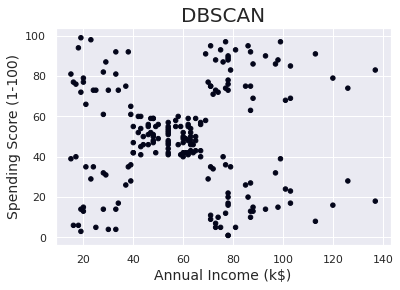

In [472]:
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],c=df2['DBSCAN_Cluster1'],s=20)

plt.title('DBSCAN',fontsize=20,)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)

plt.show()

# **Plot K-distance to get optimum eps value**

In [437]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df2)
distances, indices = nbrs.kneighbors(df2)

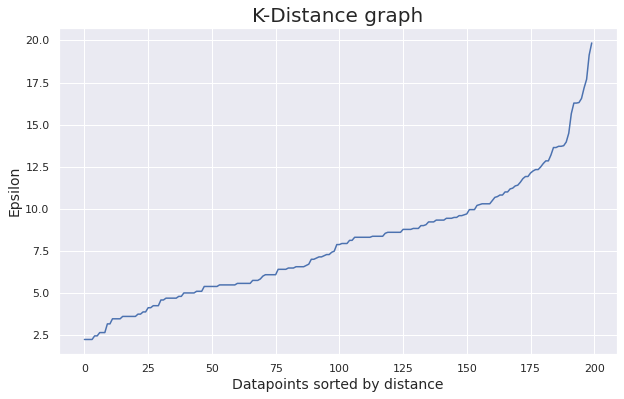

In [438]:
distances1=np.sort(distances,axis=0)
distances1 = distances1[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances1)
plt.title('K-Distance graph',fontsize=20,)
plt.xlabel('Datapoints sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

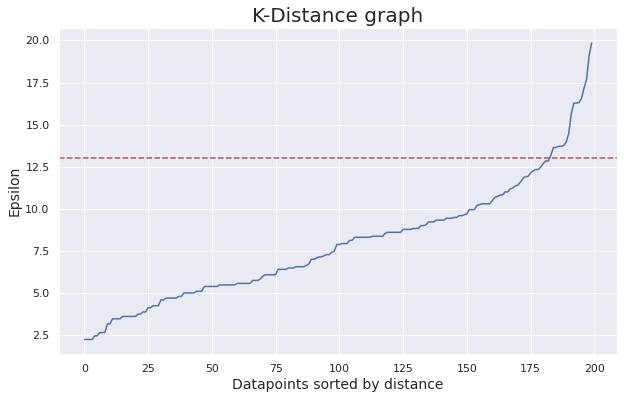

In [439]:
distances1=np.sort(distances,axis=0)
distances1 = distances1[:,1]
plt.figure(figsize=(10,6))
plt.axhline(y=13,color='r',linestyle='--')
plt.plot(distances1)
plt.title('K-Distance graph',fontsize=20,)
plt.xlabel('Datapoints sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# **Eps(distance) considered as 13**





In [440]:
# we don't know best minimum sample size so we are writing for loop and passing values
eps=[10,10.5,11,11.5,12,12.5]
for i in eps:
  print()
  print(f'Epsilon{i}')
  print()
  for min_samples in range(3,10):
    clusterer = DBSCAN(eps=i, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df2)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)


Epsilon10

eps= [10, 10.5, 11, 11.5, 12, 12.5] | min_samples=  3 | obtained clustering:  [(1, 76), (2, 15), (3, 11), (4, 6), (5, 11), (6, 30), (7, 6), (8, 3), (9, 18), (10, 3), (11, 3), (12, 4), (13, 8), (14, 3), (15, 3)]
eps= [10, 10.5, 11, 11.5, 12, 12.5] | min_samples=  4 | obtained clustering:  [(1, 98), (2, 9), (3, 6), (4, 6), (5, 6), (6, 3), (7, 11), (8, 15), (9, 15), (10, 6), (11, 7), (12, 7), (13, 4), (14, 7)]
eps= [10, 10.5, 11, 11.5, 12, 12.5] | min_samples=  5 | obtained clustering:  [(1, 127), (2, 9), (3, 5), (4, 11), (5, 12), (6, 8), (7, 6), (8, 4), (9, 6), (10, 7), (11, 5)]
eps= [10, 10.5, 11, 11.5, 12, 12.5] | min_samples=  6 | obtained clustering:  [(1, 176), (2, 6), (3, 4), (4, 8), (5, 6)]
eps= [10, 10.5, 11, 11.5, 12, 12.5] | min_samples=  7 | obtained clustering:  [(1, 200)]
eps= [10, 10.5, 11, 11.5, 12, 12.5] | min_samples=  8 | obtained clustering:  [(1, 200)]
eps= [10, 10.5, 11, 11.5, 12, 12.5] | min_samples=  9 | obtained clustering:  [(1, 200)]

Epsilon10.5

ep

Eps value is 12.5 and min_samples=3

In [441]:
from sklearn.cluster import DBSCAN
dbscan1=DBSCAN(eps=12.5,min_samples= 3)
dbscan1.fit(df2)

DBSCAN(eps=12.5, min_samples=3)

In [442]:
df2['DBSCAN_Cluster']=dbscan1.labels_

In [443]:
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster1,hc_Cluster,DBSCAN_Cluster1,DBSCAN_Cluster
0,1,19,15,39,3,1,1,-1,-1
1,2,21,15,81,0,1,1,-1,0
2,3,20,16,6,3,1,1,-1,-1
3,4,23,16,77,0,1,1,-1,0
4,5,31,17,40,3,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,2,2,0,-1,-1
196,197,45,126,28,4,0,0,-1,-1
197,198,32,126,74,2,2,0,-1,-1
198,199,32,137,18,4,0,0,-1,-1


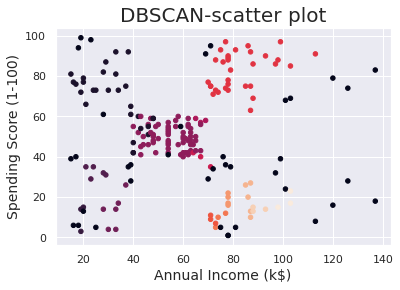

In [444]:
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],c=df2['DBSCAN_Cluster'],s=20)
plt.title('DBSCAN-scatter plot',fontsize=20,)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.show()


# **Model performance and evulation using Silhouette Score**

# **For KMeans**

In [446]:
metrics.silhouette_score(df2,df2['Cluster'])

0.43808899281995123

# **For Agglomerative**

In [470]:
metrics.silhouette_score(df2,df2['hc_Cluster'])

0.38099414882653415

# **For DBSCAN**

In [445]:
from sklearn.metrics import silhouette_score
metrics.silhouette_score(df2,df2['DBSCAN_Cluster'])

0.061598126939058175

# Interpetation:
*  Most of the annual income falls between 50K to 85K.
*  Customers are in different age groups mostly age groups are between 30-40.
**From all the three models KMeans algorithm is better when compared with other models i.e.,43%**